In [5]:

# Here is an interesting way to plot routes that 10 trucks drove in a 24 hour period. We are tracking trucks based on 
# longitude and latitude coordinates, in 1 minute frequencies. Each different color represents a different truck, 
# and the route it drove in 24 hours.

import folium
from folium.plugins import TimestampedGeoJson
import numpy as np

# Function to simulate truck movement and generate random coordinates
def simulate_truck_movement(num_points=1440, num_trucks=10):
    # Generate time points for a day (1440 minutes)
    time_points = np.linspace(0, 24, num_points)

    # Generate random starting coordinates for each truck
    truck_coordinates = {f'Truck_{i+1}': {'latitude': np.random.uniform(35, 40),
                                           'longitude': np.random.uniform(-120, -100),
                                           'speed': np.random.uniform(5, 20),
                                           'color': f'#{np.random.randint(0, 0xFFFFFF):06x}'}
                         for i in range(num_trucks)}
    
    # Simulate movement for each truck
    movement_data = {'type': 'FeatureCollection', 'features': []}
    for t in time_points:
        for truck, coords in truck_coordinates.items():
            # Simulate movement based on speed and time
            coords['latitude'] += (np.random.normal(0, 0.0005) * coords['speed'])
            coords['longitude'] += (np.random.normal(0, 0.0005) * coords['speed'])

            # Add coordinates to GeoJSON data
            feature = {
                'type': 'Feature',
                'geometry': {
                    'type': 'Point',
                    'coordinates': [coords['longitude'], coords['latitude']],
                },
                'properties': {
                    'time': str(t),
                    'icon': 'circle',
                    'iconstyle': {
                        'fillColor': coords['color'],
                        'fillOpacity': 0.6,
                        'color': 'transparent',  # Set the border color to transparent
                        'radius': 5,
                    },
                },
            }
            movement_data['features'].append(feature)

    return movement_data

# Plotting function
def plot_truck_movement(truck_movement_data):
    m = folium.Map(location=[36, -110], zoom_start=5)  # Centered around the United States

    TimestampedGeoJson(truck_movement_data, period='PT1M', duration='PT1M', add_last_point=True).add_to(m)

    m.save('truck_movement_map.html')
    return m

# Simulate truck movement
truck_movement_data = simulate_truck_movement()

# Plot the results on a map
plot_truck_movement(truck_movement_data)


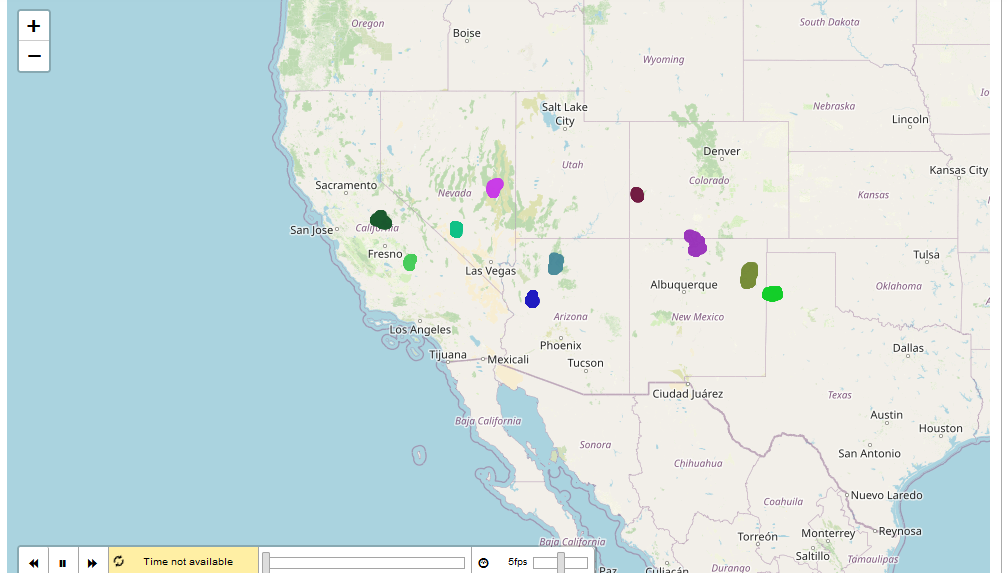

In [6]:

# Zoomed out view of all 10 trucks routes.

from IPython.display import Image
from IPython.core.display import HTML 
PATH = "C:\\Users\\"
Image(filename = PATH + "1.JPG")


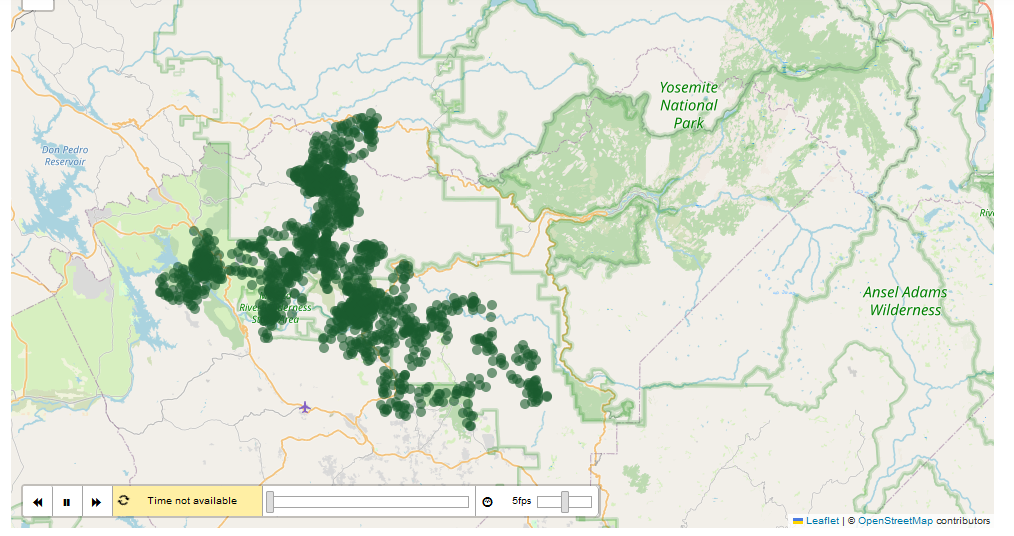

In [7]:

# Here is a zoomed version of what we saw above.

from IPython.display import Image
from IPython.core.display import HTML 
PATH = "C:\\Users\\"
Image(filename = PATH + "2.JPG")


In [8]:

# Here is a similar exercise, but instead of plotting the routes, we are calculating the total distance that cach truck
# drove in a 24 hour period.

import folium
from folium.plugins import TimestampedGeoJson
import numpy as np
from geopy.distance import geodesic

# Function to calculate distance between two points using Haversine formula
def calculate_distance(coord1, coord2):
    return geodesic(coord1, coord2).miles

# Function to simulate truck movement and generate random coordinates
def simulate_truck_movement(num_points=1440, num_trucks=10):
    # Generate time points for a day (1440 minutes)
    time_points = np.linspace(0, 24, num_points)

    # Generate random starting coordinates for each truck
    truck_coordinates = {f'Truck_{i+1}': {'latitude': np.random.uniform(35, 40),
                                           'longitude': np.random.uniform(-120, -100),
                                           'speed': np.random.uniform(5, 20),
                                           'color': f'#{np.random.randint(0, 0xFFFFFF):06x}',
                                           'total_distance': 0}
                         for i in range(num_trucks)}
    
    # Simulate movement for each truck
    movement_data = {'type': 'FeatureCollection', 'features': []}
    for t in time_points:
        for truck, coords in truck_coordinates.items():
            # Simulate movement based on speed and time
            new_latitude = coords['latitude'] + (np.random.normal(0, 0.0005) * coords['speed'])
            new_longitude = coords['longitude'] + (np.random.normal(0, 0.0005) * coords['speed'])

            # Calculate distance and update total_distance
            distance = calculate_distance((coords['latitude'], coords['longitude']), (new_latitude, new_longitude))
            coords['total_distance'] += distance

            # Update coordinates
            coords['latitude'] = new_latitude
            coords['longitude'] = new_longitude

            # Add coordinates to GeoJSON data
            feature = {
                'type': 'Feature',
                'geometry': {
                    'type': 'Point',
                    'coordinates': [coords['longitude'], coords['latitude']],
                },
                'properties': {
                    'time': str(t),
                    'icon': 'circle',
                    'iconstyle': {
                        'fillColor': coords['color'],
                        'fillOpacity': 0.6,
                        'color': 'transparent',  # Set the border color to transparent
                        'radius': 5,
                    },
                },
            }
            movement_data['features'].append(feature)

    return movement_data, truck_coordinates

# Plotting function
def plot_truck_movement(truck_movement_data):
    m = folium.Map(location=[36, -110], zoom_start=5)  # Centered around the United States

    TimestampedGeoJson(truck_movement_data, period='PT1M', duration='PT1M', add_last_point=True).add_to(m)

    m.save('truck_movement_map.html')
    return m

# Simulate truck movement
truck_movement_data, truck_coordinates = simulate_truck_movement()

# Plot the results on a map
plot_truck_movement(truck_movement_data)

# Calculate total distance for each truck
for truck, coords in truck_coordinates.items():
    print(f"{truck} Total Distance: {coords['total_distance']:.2f} miles")
    

Truck_1 Total Distance: 925.68 miles
Truck_2 Total Distance: 646.57 miles
Truck_3 Total Distance: 961.99 miles
Truck_4 Total Distance: 960.35 miles
Truck_5 Total Distance: 509.96 miles
Truck_6 Total Distance: 776.69 miles
Truck_7 Total Distance: 886.30 miles
Truck_8 Total Distance: 991.16 miles
Truck_9 Total Distance: 522.46 miles
Truck_10 Total Distance: 299.27 miles


In [ ]:

# GPS fleet vehicle tracking helps companies keep tabs on their vehicles and drivers to maximize how these assets 
# operate, and reach their customers and clients efficiently. It also helps reduce fuel waste, improve 
# maintenance practices, and overall makes customer service more positive. Win, win, win!!!
